In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict
from statistics import mean

In [2]:
results_dir = "../results"
blockdevices = os.environ["BLOCKDEVICES"].split(" ")
modes = os.environ["MODES"].split(" ")
iodepths = os.environ["IO_DEPTH"].split(" ")
numjobs = os.environ["NUM_JOBS"]
blocksize = os.environ["BLOCKSIZE"]

In [3]:
def get_mean(lst):
    return "%.2f" % mean(lst)

def get_moving_avg(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

# Bandwidth Plots

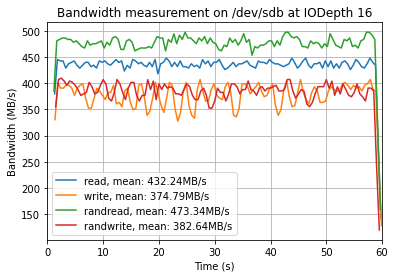

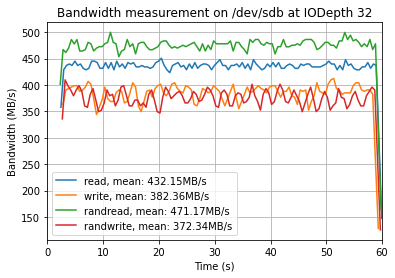

In [4]:
for iodepth in iodepths:
    for blkdev in blockdevices:        
        base_dir = os.path.join(f"../results/FIO_OUTPUT/{blkdev}/{blocksize}")
        
        for mode in modes:
            data = defaultdict(dict)
            for job_num in range(1, int(numjobs) + 1):
                
                time = []
                value = []
                
                with open(os.path.join(base_dir, f"{mode}-iodepth-{iodepth}-numjobs-{os.environ['NUM_JOBS']}_bw.{job_num}.log"), "r") as f:
                    row = f.readlines()
                    for datapoint in row:
                        time.append(int(datapoint.split(",")[0])/1000)
                        value.append(int(datapoint.split(",")[1])/1000)

                data[job_num]['time'] = time
                data[job_num]['value'] = value
            
            min_time_length = 1000000000
            min_val_length = 1000000000
            
            for job_num in range(1, int(numjobs) + 1):
                min_time_length = min(min_time_length, len(data[job_num]['time']))
                min_val_length = min(min_val_length, len(data[job_num]['value']))

            cum_time = []
            cum_val = []

            for idx in range(0, min_time_length):
                
                sum_time = 0
                for job_num in range(1, int(numjobs) + 1):
                    sum_time += data[job_num]['time'][idx]
                    
                sum_time /= int(numjobs)
                cum_time.append(sum_time)

                sum_val = 0
                for job_num in range(1, int(numjobs) + 1):
                    sum_val += data[job_num]['value'][idx]

                cum_val.append(sum_val)

            moving_avg_val = list(get_moving_avg(cum_val, 3))
            mean_val = get_mean(moving_avg_val)
            plt.xlim(0, 180)
            plt.plot(cum_time, moving_avg_val, markersize=10, linewidth=1.5, label=f"{mode}, mean: {mean_val}MB/s")

        plt.xlabel("Time (s)")
        plt.ylabel("Bandwidth (MB/s)")
        plt.title(f"Bandwidth measurement on /dev/{blkdev} at IODepth {iodepth}")
        plt.grid()
        plt.legend()
        plt.savefig(os.path.join(results_dir, f"./fio-bw-{blkdev}-{iodepth}.png"), dpi=300, bbox_inches='tight')
        plt.show()

# IOPS Plots

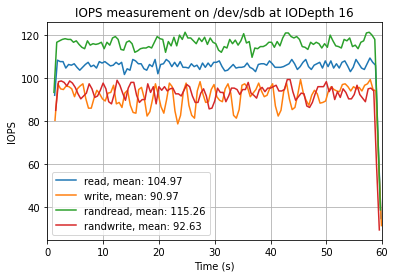

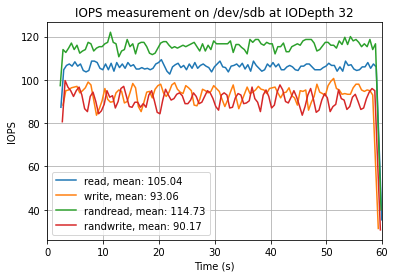

In [5]:
for iodepth in iodepths:
    for blkdev in blockdevices:        
        base_dir = os.path.join(f"../results/FIO_OUTPUT/{blkdev}/{blocksize}")
        
        for mode in modes:
            data = defaultdict(dict)
            for job_num in range(1, int(numjobs) + 1):
                
                time = []
                value = []
                
                with open(os.path.join(base_dir, f"{mode}-iodepth-{iodepth}-numjobs-{os.environ['NUM_JOBS']}_iops.{job_num}.log"), "r") as f:
                    row = f.readlines()
                    for datapoint in row:
                        time.append(int(datapoint.split(",")[0])/1000)
                        value.append(int(datapoint.split(",")[1]))

                data[job_num]['time'] = time
                data[job_num]['value'] = value
            
            min_time_length = 1000000000
            min_val_length = 1000000000
            
            for job_num in range(1, int(numjobs) + 1):
                min_time_length = min(min_time_length, len(data[job_num]['time']))
                min_val_length = min(min_val_length, len(data[job_num]['value']))

            cum_time = []
            cum_val = []

            for idx in range(0, min_time_length):
                
                sum_time = 0
                for job_num in range(1, int(numjobs) + 1):
                    sum_time += data[job_num]['time'][idx]
                    
                sum_time /= int(numjobs)
                cum_time.append(sum_time)

                sum_val = 0
                for job_num in range(1, int(numjobs) + 1):
                    sum_val += data[job_num]['value'][idx]

                cum_val.append(sum_val)

            moving_avg_val = list(get_moving_avg(cum_val, 3))
            mean_val = get_mean(moving_avg_val)
            plt.xlim(0, 180)
            plt.plot(cum_time, moving_avg_val, markersize=10, linewidth=1.5, label=f"{mode}, mean: {mean_val}")

        plt.xlabel("Time (s)")
        plt.ylabel("IOPS")
        plt.title(f"IOPS measurement on /dev/{blkdev} at IODepth {iodepth}")
        plt.grid()
        plt.legend()
        plt.savefig(os.path.join(results_dir, f"./fio-iops-{blkdev}-{iodepth}.png"), dpi=300, bbox_inches='tight')
        plt.show()

# Latency Plots

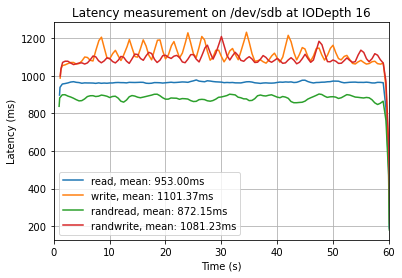

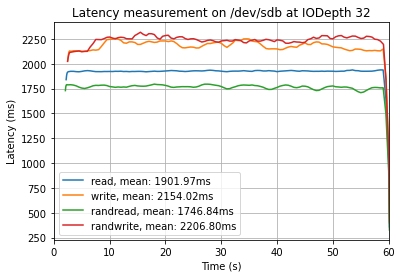

In [6]:
for iodepth in iodepths:
    for blkdev in blockdevices:        
        base_dir = os.path.join(f"../results/FIO_OUTPUT/{blkdev}/{blocksize}")
        
        for mode in modes:
            data = defaultdict(dict)
            for job_num in range(1, int(numjobs) + 1):
                
                time = []
                value = []
                
                with open(os.path.join(base_dir, f"{mode}-iodepth-{iodepth}-numjobs-{os.environ['NUM_JOBS']}_lat.{job_num}.log"), "r") as f:
                    row = f.readlines()
                    for datapoint in row:
                        time.append(int(datapoint.split(",")[0])/1000)
                        value.append(int(datapoint.split(",")[1])/10000000)

                data[job_num]['time'] = time
                data[job_num]['value'] = value
            
            min_time_length = 1000000000
            min_val_length = 1000000000
            
            for job_num in range(1, int(numjobs) + 1):
                min_time_length = min(min_time_length, len(data[job_num]['time']))
                min_val_length = min(min_val_length, len(data[job_num]['value']))

            cum_time = []
            cum_val = []

            for idx in range(0, min_time_length):
                
                sum_time = 0
                for job_num in range(1, int(numjobs) + 1):
                    sum_time += data[job_num]['time'][idx]
                    
                sum_time /= int(numjobs)
                cum_time.append(sum_time)

                sum_val = 0
                for job_num in range(1, int(numjobs) + 1):
                    sum_val += data[job_num]['value'][idx]

                cum_val.append(sum_val)

            moving_avg_val = list(get_moving_avg(cum_val, 3))
            mean_val = get_mean(moving_avg_val)
            plt.xlim(0, 180)
            plt.plot(cum_time, moving_avg_val, markersize=10, linewidth=1.5, label=f"{mode}, mean: {mean_val}ms")

        plt.xlabel("Time (s)")
        plt.ylabel("Latency (ms)")
        plt.title(f"Latency measurement on /dev/{blkdev} at IODepth {iodepth}")
        plt.grid()
        plt.legend()
        plt.savefig(os.path.join(results_dir, f"./fio-lat-{blkdev}-{iodepth}.png"), dpi=300, bbox_inches='tight')
        plt.show()